<h1> Tugas Kecil 2 IF3170 Inteligensi Buatan </h1>
<h2> Exploratory Data Analysis </h2>
<br>
<h4> Dibuat oleh: <br><br>
1. Jason Rivalino (13521008)<br><br>
2. Muhammad Malik Ibrahim Baharsyah (13521029)</h4>

***

<h2> Keterangan Tugas </h2>

Exploratory Data Analysis (EDA) adalah pendekatan statistik untuk menganalisis dataset dengan tujuan untuk memahami struktur dan karakteristik data, serta mengidentifikasi pola, hubungan, anomali, dan kecenderungan yang mungkin terdapat dalam data. EDA membantu dalam merumuskan hipotesis, mengidentifikasi variabel penting, dan memahami distribusi data sebelum menerapkan metode analisis statistik yang lebih lanjut. Pada Tugas Kecil kedua ini, kalian akan diminta untuk menganalisis dataset yang disediakan. Tugas ini bertujuan agar kalian dapat mengimplementasikan teknik-teknik EDA yang sudah kalian pelajari.

<h3>Pertanyaan</h3>
Lakukan analisis data latih terhadap hal berikut. Insight apa yang kalian dapatkan?<br>

1. Statistik dasar (mean, min, max, dll)
2. Duplicate value
3. Missing value
4. Outlier
5. Untuk kolom numerik: distribusi data (plot dan analisis kurtosis)<br>
   Untuk kolom non numerik: bar chart
6. Korelasi dengan kolom target

Analisis dilakukan pada semua kolom sehingga kesimpulan tentang dataset lebih akurat.

***

<h3>Deskripsi Kolom</h3>

battery_power: Total energi baterai dalam satu waktu diukur dalam mAh<br>
blue: Memiliki bluetooth atau tidak<br>
clock_speed: Kecepatan mikroprosesor menjalankan instruksi<br>
dual_sim: Memiliki dukungan dual sim atau tidak<br>
fc: Resolusi kamera depan dalam megapiksel<br>
four_g: Memiliki 4G atau tidak<br>
int_memory: Memori internal dalam gigabyte<br>
m_dep: Ketebalan ponsel dalam cm<br>
mobile_wt: Berat ponsel<br>
n_cores: Jumlah core prosesor<br>
pc: Resolusi kamera utama dalam megapiksel<br>
px_height: Tinggi resolusi piksel<br>
px_width: Lebar resolusi piksel<br>
ram: Ukuran RAM dalam megabyte<br>
sc_h: Tinggi layar ponsel dalam cm<br>
sc_w: Lebar layar ponsel dalam cm<br>
talk_time: Waktu telepon maksimum dalam satu kali pengisian baterai<br>
three_g: Memiliki 3G atau tidak<br>
touch_screen: Memiliki layar sentuh atau tidak<br>
wifi: Memiliki wifi atau tidak<br>
price_range (target): Rentang harga dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) atau 3 (biaya sangat tinggi).

***

<h2> Data Loading </h2>

In [ ]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("data_train.csv")
df_valid = pd.read_csv("data_validation.csv")

***

<h2>1. Menampilkan Statistik Dasar pada Data</h2>

<h3>Menampilkan informasi keseluruhan data</h3>

In [ ]:
# Menampilkan banyak data (banyak baris)
print("Banyaknya jumlah baris dalam data adalah:",df_train.shape[0])

# Menampilkan banyak atribut (banyak kolom)
print("Banyaknya jumlah kolom dalam data adalah:",df_train.shape[1])

mean = df_train.mean()
median = df_train.median()
modus = df_train.mode().iloc[0]
std = df_train.std()
var = df_train.var()
maximum = df_train.max()
minimum = df_train.min()
ranges = maximum - minimum
quartile1 = df_train.quantile(0.25)
quartile2 = df_train.quantile(0.50)
quartile3 = df_train.quantile(0.75)
iqr = quartile3 - quartile1
skewness = df_train.skew()
kurtosis = df_train.kurtosis()

statistics = pd.DataFrame({'Rata-rata': mean,
                           'Median': median,
                           'Modus': modus,
                           'Standar deviasi': std,
                           'Variansi': var,
                           'Range': ranges,
                           'Nilai max': maximum,
                           'Nilai min': minimum,
                           'Kuartil 0.25': quartile1,
                           'Kuartil 0.5': quartile2,
                           'Kuartil 0.75': quartile3,
                           'Interkuartil': iqr,
                           'Skewness': skewness,
                           'Kurtosis': kurtosis})

print("")
print("Informasi statistik data: ")
print(statistics)

Banyaknya jumlah baris dalam data adalah: 1400
Banyaknya jumlah kolom dalam data adalah: 21

Informasi statistik data: 
                 Rata-rata  Median   Modus  Standar deviasi      Variansi  \
battery_power  1237.145714  1219.0   772.0       430.051785  1.849445e+05   
blue              0.493571     0.0     0.0         0.500137  2.501373e-01   
clock_speed       1.521714     1.5     0.5         0.814723  6.637740e-01   
dual_sim          0.502857     1.0     1.0         0.500171  2.501705e-01   
fc                4.275000     3.0     0.0         4.324170  1.869845e+01   
four_g            0.530000     1.0     1.0         0.499278  2.492781e-01   
int_memory       31.962143    32.0    27.0        18.162970  3.298935e+02   
m_dep             0.507857     0.5     0.1         0.288539  8.325488e-02   
mobile_wt       139.375714   139.0   182.0        35.400803  1.253217e+03   
n_cores           4.481429     4.0     4.0         2.279836  5.197653e+00   
pc                9.917143    10.

In [ ]:
pd.set_option("display.max_columns", None)
data_table = df_train.describe(include=[np.number])
data_table.loc['modus'] = df_train.mode().loc[0]
data_table.loc['variance'] = df_train.var()
data_table.loc['range'] = data_table.loc['max'] - data_table.loc['min']
data_table.loc['interquartile range'] = data_table.loc['75%'] - data_table.loc['25%']
data_table.loc['skewness'] = df_train.skew()
data_table.loc['kurtosis'] = df_train.kurt()
data_table

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,0.493571,1.521714,0.502857,4.275000,0.530000,31.962143,0.507857,139.375714,4.481429,9.917143,643.177857,1251.717143,2.106731e+03,12.285714,5.665000,11.042143,0.760714,0.489286,0.495000,1.477857
std,430.051785,0.500137,0.814723,0.500171,4.324170,0.499278,18.162970,0.288539,35.400803,2.279836,6.080023,444.628980,428.982850,1.078347e+03,4.204198,4.372234,5.399052,0.426800,0.500064,0.500154,1.117575
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,2.560000e+02,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,864.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,108.000000,2.000000,5.000000,273.750000,876.500000,1.201000e+03,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1219.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,139.000000,4.000000,10.000000,561.000000,1247.000000,2.102000e+03,12.000000,5.000000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1602.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,169.000000,7.000000,15.000000,950.250000,1627.500000,3.035750e+03,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3.998000e+03,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000
modus,772.000000,0.000000,0.500000,1.000000,0.000000,1.000000,27.000000,0.100000,182.000000,4.000000,10.000000,88.000000,1247.000000,1.229000e+03,17.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000
variance,184944.537723,0.250137,0.663774,0.250171,18.698445,0.249278,329.893491,0.083255,1253.216851,5.197653,36.966682,197694.929745,184026.285910,1.162833e+06,17.675278,19.116430,29.149760,0.182158,0.250064,0.250154,1.248973


<h3>Analisis:</h3><br>
Berdasarkan hasil data yang ada diatas, data yang didapat adalah bahwa data latih keseluruhan memiliki total sebanyak 1400 baris dan 21 kolom. Disini untuk setiap kolom yang terdapat pada data, ditampilkan berbagai informasi dasar yang diperlukan untuk pengolahan data antara lain:

1. Mean (rata-rata): ditampilkan dengan fungsi df_train.mean() dan bertujuan untuk melihat rata-rata keseluruhan dari seluruh data yang ada pada sebuah kolom dataset
2. Median: ditampilkan dengan fungsi df_train.median() dan bertujuan untuk melihat nilai tengah dari seluruh data yang ada pada sebuah kolom dataset
3. Modus: ditampilkan dengan fungsi df_train.mode().iloc[0] dan bertujuan untuk melihat nilai yang paling sering muncul dari seluruh data yang ada pada sebuah kolom dataset. Adapun penggunaan [0] adalah untuk menampilkan data yang memiliki frekuensi kemunculan yang tertinggi
4. Standar deviasi: ditampilkan dengan fungsi df_train.std() dan bertujuan untuk menentukan persebaran data pada suatu sampel dan menganalisis kedekatan elemen data dengan nilai rata-rata yang ada dari seluruh data pada sebuah kolom dataset
5. Varians: ditampilkan dengan fungsi df_train.var() dan memiliki tujuan yang kurang lebih sama dengan standar deviasi. Varians sendiri sebenarnya bisa didapatkan dengan cara mengkuadratkan nilai yang didapat dari standar deviasi.
6. Nilai maksimum: ditampilkan dengan fungsi df_train.max() dan bertujuan untuk menampilkan nilai maksimum tertinggi dari seluruh data yang ada pada sebuah kolom dataset
7. Nilai minimum: ditampilkan dengan fungsi df_train.min() dan bertujuan untuk menampilkan nilai minimum terendah dari seluruh data yang ada pada sebuah kolom dataset
8. Range: ditampilkan dengan mengurangkan nilai maksimum dengan nilai minimum yang didapat melalui fungsi sebelumnya dan bertujuan untuk menghitung nilai jarak antara data terbesar dengan data terkecil dari seluruh data yang ada pada sebuah kolom dataset
9. Kuartil bawah: ditampilkan dengan fungsi df_train.quantile(0.25) dan bertujuan untuk menampilkan nilai yang merupakan nilai tengah antara nilai terkecil (min) dan median dari seluruh data yang ada pada sebuah kolom dataset
10. Kuartil tengah: ditampilkan dengan fungsi df_train.quantile(0.50) dan bertujuan untuk menampilkan nilai kuartil tengah dari seluruh data yang ada pada sebuah kolom dataset. Nilai kuartil tengah sendiri dalam data juga bisa disebut sebagai nilai median
11. Kuartil atas: ditampilkan dengan fungsi df_train.quantile(0.75) dan bertujuan untuk menampilkan nilai yang merupakan nilai tengah antara median dan nilai terbesar (max) dari seluruh data yang ada pada sebuah kolom dataset
12. Jangkauan Interkuartil: ditampilkan dengan mengurangkan nilai kuartil atas dengan nilai kuartil bawah yang didapat melalui fungsi sebelumnya dan bertujuan untuk menghitung nilai jarak antara kuartil atas (persentil 0.75) dengan kuartil bawah (persentil 0.25) dari seluruh data yang ada pada sebuah kolom dataset
13. Skewness: ditampilkan dengan fungsi df_train.skew() dan bertujuan untuk mengukur kesimetrisan dari seluruh data yang ada pada sebuah kolom dataset
14. Kurtosis: ditampilkan dengan fungsi df_train.kurtosis() dan bertujuan untuk mengukur derajat keruncingan dari seluruh data yang ada pada sebuah kolom dataset terhadap distribusi normal

Dari hasil data yang ditampilkan, terdapat beberapa perbedaan pada sejumlah kolom yaitu terdapat kolom yang memiliki nilai persebaran data yang lebih meluas dan juga kolom yang datanya tersebar dalam skala kecil saja (dapat dilihat dari nilai rata-rata data yang berkisar antara nilai 0-1 saja). Hal ini akan berdampak pada sifat numerik dari  data yang akan dibahas pada nomor 5.


```
```
***
```
```

<h2>2. Menampilkan Duplicate Value pada Data</h2>

In [ ]:
# Cari baris yang duplikat
duplicate_values = df_train.duplicated(keep=False)
print("Jumlah baris yang duplikat adalah: %d" % (duplicate_values.sum()))
print()
print("Menampilkan baris yang duplikat:")
df_train[duplicate_values]

Jumlah baris yang duplikat adalah: 0

Menampilkan baris yang duplikat:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<h3>Analisis:</h3><br>
Berdasarkan hasil data yang ada diatas, setelah dilakukan pengecekan terhadap keseluruhan data pada dataset, didapatkan hasil bahwa untuk setiap baris dari data sudah memiliki nilai yang berbeda satu sama lain sehingga tidak menimbulkan adanya nilai data yang duplikat pada keseluruhan tabel. Hal ini menunjukkan bahwa data yang ada sudah bersih. Adapun jika pada suatu data ditemukan dua baris atau lebih yang bersifat duplikat, data tersebut perlu dilakukan pembersihan dengan membuang nilai yang duplikat dengan alasan karena data yang duplikat dapat memberikan pengaruh terhadap perhitungan statistika dasar dari keseluruhan data (memengaruhi nilai rata-rata, median, dll) sehingga jika tidak dibersihkan, akan merusak nilai statistik yang ada pada data.

```
```
***
```
```

<h2>3. Menampilkan Missing Value pada Data</h2>

In [ ]:
# Mencari nilai yang hilang
missing_values = df_train.isnull().sum()
print("Jumlah baris yang terdapat nilai hilang (missing values) adalah: %d" % (missing_values.sum()))
print()
print(missing_values)

Jumlah baris yang terdapat nilai hilang (missing values) adalah: 0

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<h3>Analisis:</h3><br>
Berdasarkan hasil data yang ada diatas, setelah dilakukan pengecekan terhadap keseluruhan data pada dataset, didapatkan hasil bahwa untuk setiap baris dari data sudah terdapat sebuah nilai sehingga dari data keseluruhan, tidak ada sebuah baris dengan kekosongan data pada salah satu kolomnya. Hal ini menunjukkan bahwa data yang ada sudah bersih. Adapun jika pada suatu data ditemukan kekosongan, maka perlu dilakukan pengisian terhadap data yang kosong tersebut sehingga data yang ada menjadi bersih dan dapat dilakukan pengolahan secara statistika.

```
```
***
```
```

<h2>4. Menampilkan Outlier pada Data</h2>

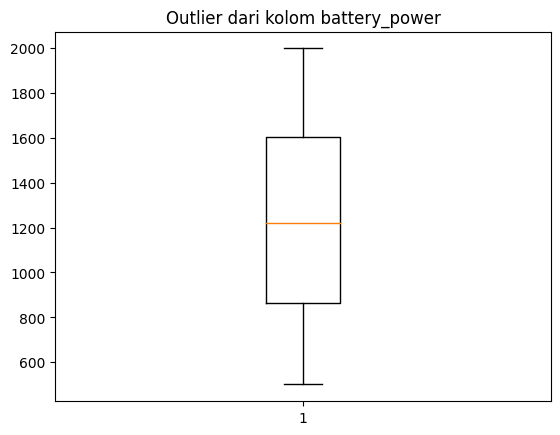

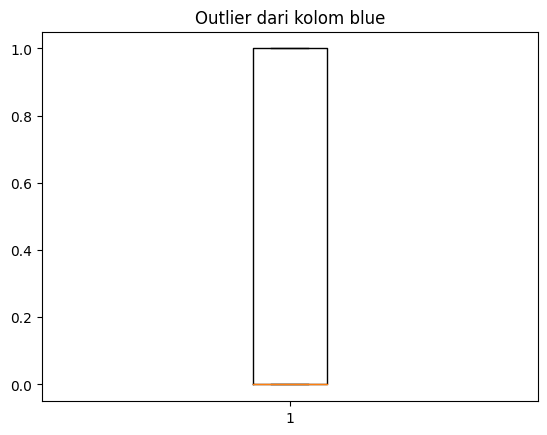

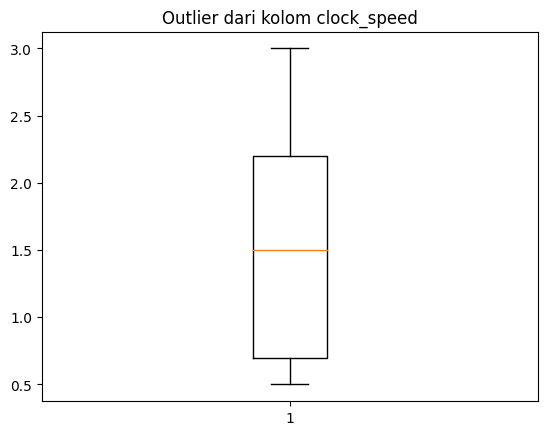

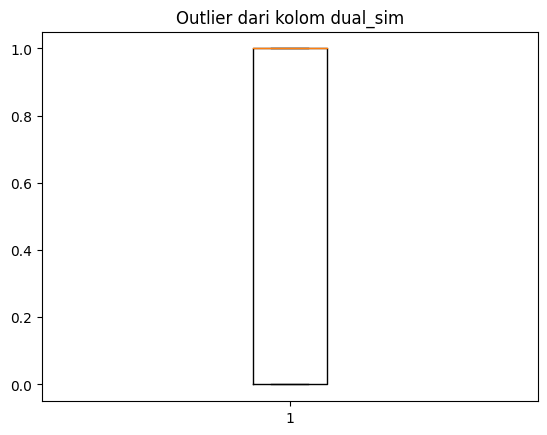

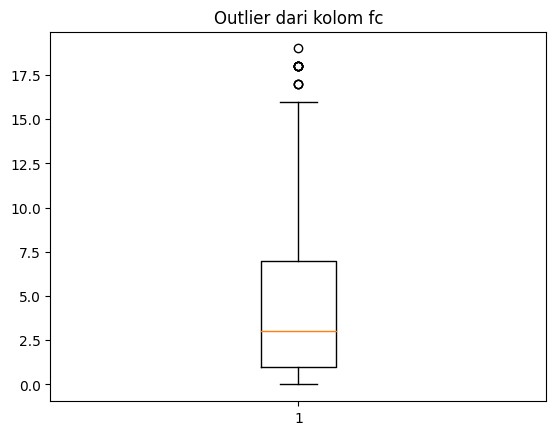

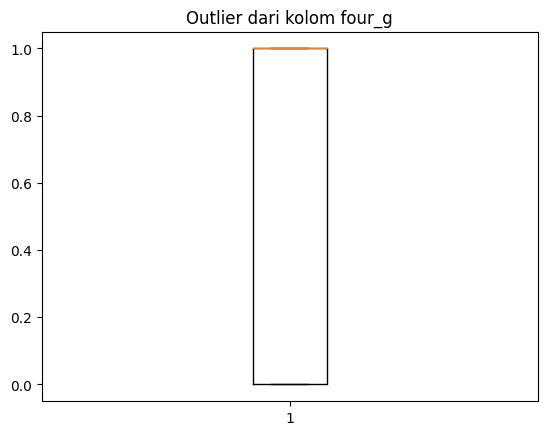

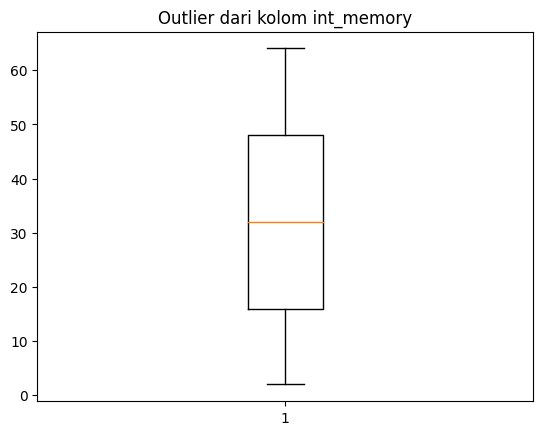

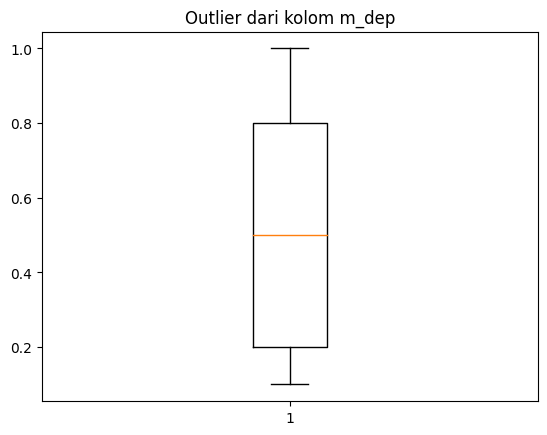

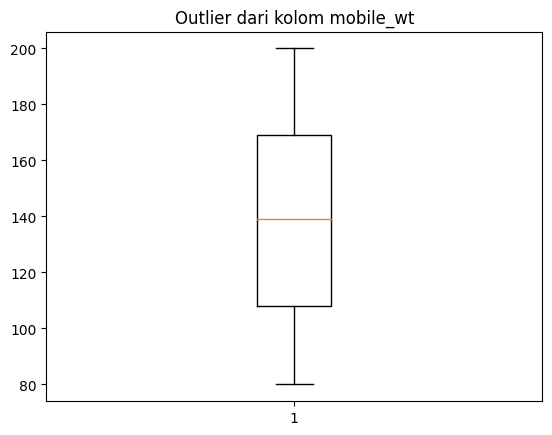

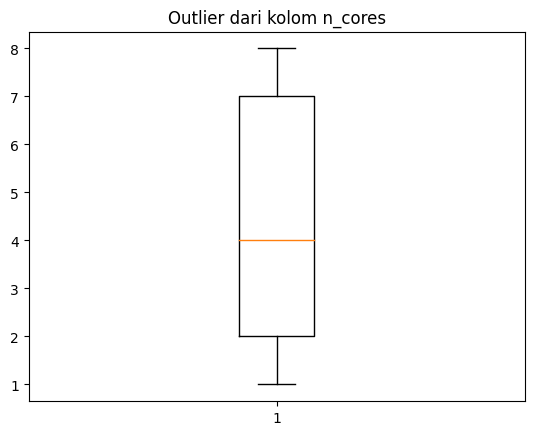

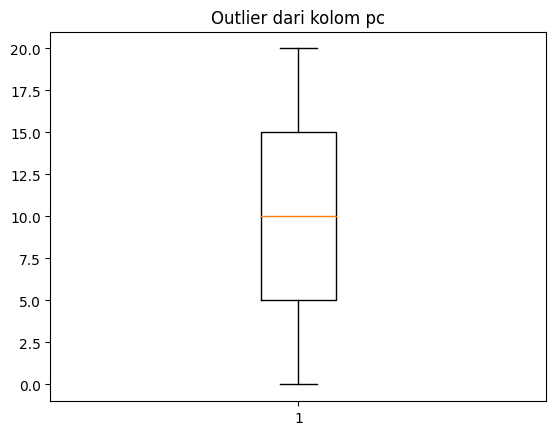

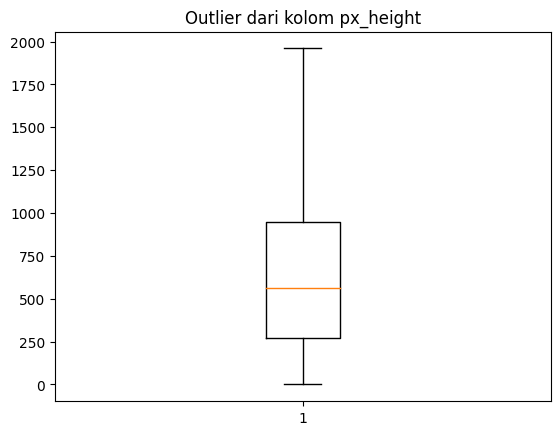

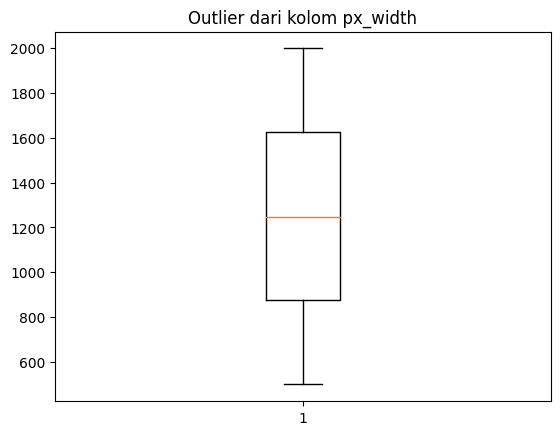

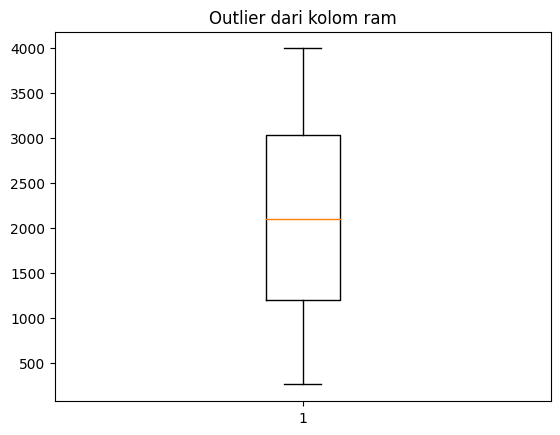

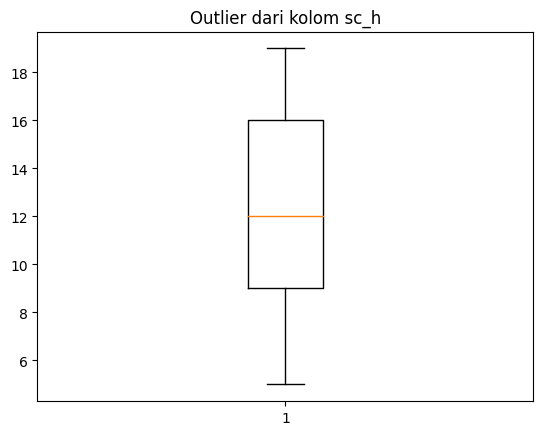

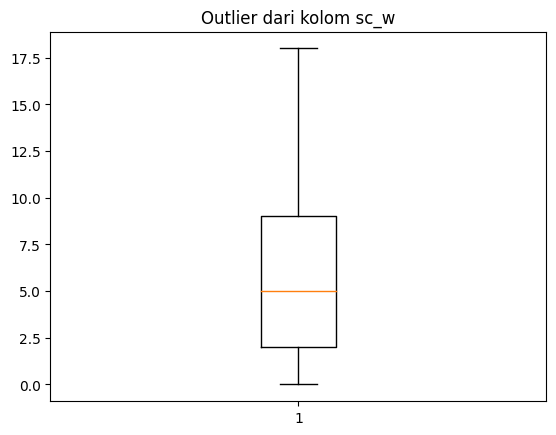

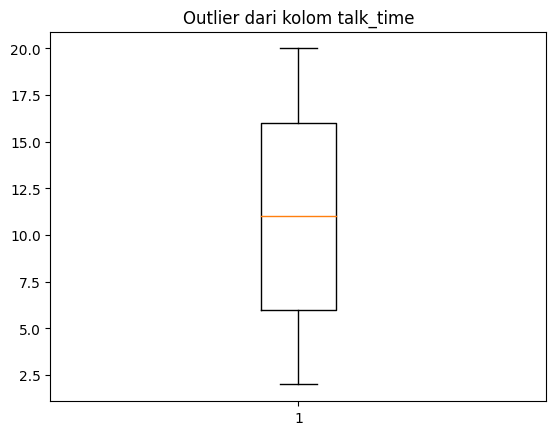

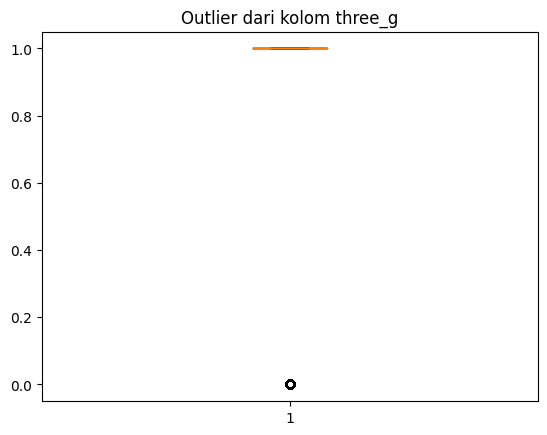

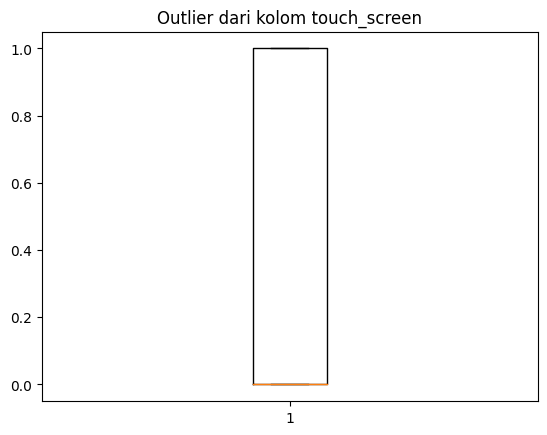

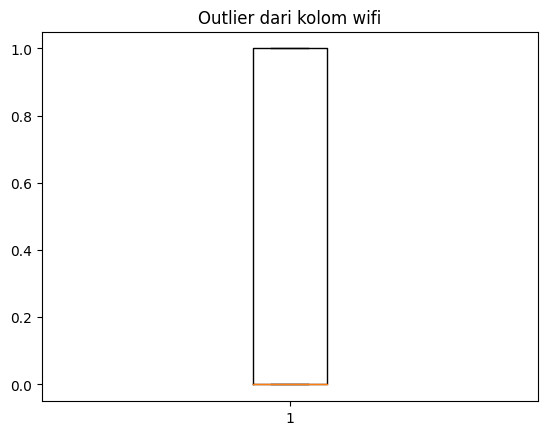

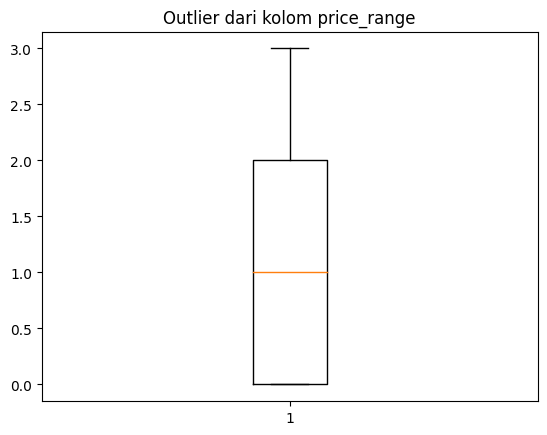

In [ ]:
# Mencari outliers dengan menampilkan boxplot untuk tiap atribut
import matplotlib.pyplot as plt

# Iterasi untuk tiap kolom
for column in df_train:
    # Membuat Boxplot untuk tiap kolom
    plt.boxplot(df_train[column])
    plt.title(f"Outlier dari kolom {column}")
    plt.show()

<h3>Analisis:</h3><br>
Berdasarkan hasil data yang ada diatas, secara tampilan boxplot dari keseluruhan atribut tabel, hampir semua kolom yang ada sudah memiliki nilai yang sesuai dengan range di dalam boxplot dan tidak memiliki nilai yang berada diluar boxplot. Hal ini menunjukkan bahwa data yang ada hampir secara keseluruhan tidak terjadi penyimpangan angka yang signifikan dalam nilai data yang ada.

Namun, masih terdapat dua buah kolom yang memiliki nilai yang berada diluar boxplot yaitu untuk kolom fc dan three_g. Terkait penjabaran pada kondisi kedua kolom ini akan dijelaskan dengan bantuan gambar kondisi pengisian angka boxplot sebagai berikut:

Untuk kolom fc, penyimpangan nilai yang ada terjadi karena ada nilai yang melebihi batas nilai maksimal yang ada pada boxplot. Untuk penjabarannya, batas nilai maksimum yang ada pada kolom fc yaitu sebesar kuartil atas + 1.5*jangkauan interkuartil yang jika berdasarkan data yang didapat pada nomor 1 untuk kolom fc, perhitungan yang ada adalah sebagai berikut:

Diketahui:
Kuartil atas (Q3) = 7, jangkauan interkuartil = 6
Nilai max boxplot = 7 + 1.5*6 = 16
	
Berdasarkan perhitungan ini, nilai yang memenuhi untuk pengisian kolom fc yaitu hanya sampai nilai 16 saja untuk nilai tertinggi. Tetapi, pada data latih yang ada, masih terdapat nilai data 17 sampai 19 yang ada pada kolom fc sehingga hal ini yang menimbulkan adanya data yang bersifat outlier pada kolom fc. Untuk mengecek informasi terkait baris yang mengandung data outlier bisa dilakukan dengan cara berikut:

Sedangkan untuk kolom three_g, penyimpangan dapat terjadi dikarenakan data yang hanya terpusat pada satu buah nilai saja. Untuk penjabarannya, batas nilai minimum yang ada pada kolom fc yaitu sebesar kuartil atas - 1.5*jangkauan interkuartil yang jika berdasarkan data yang didapat pada nomor 1 untuk kolom fc, perhitungan yang ada adalah sebagai berikut:

Diketahui:
Kuartil bawah (Q1) = 1, jangkauan interkuartil = 0
Nilai min boxplot = 1 - 1.5*0 = 1
	
Berdasarkan perhitungan ini, nilai yang memenuhi untuk pengisian kolom fc yaitu hanya sampai 1 saja untuk nilai terendah. Tetapi, pada data latih yang ada, masih terdapat nilai data yang bersifat 0 (ponsel tidak mendukung teknologi three_g) yang ada pada kolom three_g sehingga hal ini yang menimbulkan adanya data yang bersifat outlier pada kolom three_g yaitu semua data yang bernilai 0. Tetapi karena kolom three_g merupakan kolom yang bersifat non-numerik dan pengisian data hanya berdasarkan boolean true (1) atau false (0), kondisi outlier yang ada seharusnya tidak terlalu diperhitungkan.

In [ ]:
# Melakukan perhitungan jumlah baris yang mengandung outlier pada kolom fc

outlier_col = df_train['fc']

fc_out1 = outlier_col[outlier_col > 16].count()
print("Banyaknya baris dari kolom fc yang memiliki data outlier adalah:",fc_out1,"baris")
print()
print("Menampilkan data yang mengandung outlier pada kolom fc:")
fc_out2 = df_train.loc[outlier_col > 16]
fc_out2

Banyaknya baris dari kolom fc yang memiliki data outlier adalah: 11 baris

Menampilkan data yang mengandung outlier pada kolom fc:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
53,1290,1,1.4,1,19,1,35,0.3,110,4,...,405,742,879,16,2,8,1,0,0,0
98,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1
413,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
603,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
778,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
797,1772,1,1.6,0,17,1,45,0.5,159,2,...,837,1405,1146,6,1,17,1,1,0,1
1035,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
1072,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
1150,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,2
1232,1957,0,1.2,1,18,1,36,0.8,151,2,...,1194,1727,1115,16,2,18,1,0,1,1


```
```
***
```
```

<h2>5. Menampilkan distribusi data (plot dan analisis kurtosis) untuk data numerik dan bar chart untuk data non-numerik</h2>

<h3> Penentuan data numerik atau non-numerik</h3>

In [ ]:
# Menampilkan semua data yang ada pada tabel
print(df_train)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               804     1          0.8         1  12       1          41   
1              1042     0          2.2         0  15       1          11   
2              1481     1          2.0         1   0       0          35   
3              1104     0          1.7         0   1       1          60   
4               652     0          0.5         1   1       0          58   
...             ...   ...          ...       ...  ..     ...         ...   
1395            536     1          1.4         0   0       1          53   
1396           1097     0          0.8         0  10       1          21   
1397           1179     1          0.5         0   7       1          32   
1398            719     1          0.5         1   0       1          23   
1399           1439     0          0.9         0  12       1          20   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

<h3>Analisis penentuan kolom:</h3><br>
Untuk data yang bersifat numerik, data yang ada akan memiliki nilai sebaran angka yang tidak beraturan dan bersifat kualitatif. Sedangkan, untuk data yang bersifat non-numerik, sebagian besar data akan memiliki nilai yang sudah tetap, antara bersifat boolean dan hanya memiliki representasi nilai antara 0 dan 1 saja dengan 0 menyatakan nilai False dan 1 menyatakan nilai True ataupun nilai yang ada bersifat ordinal seperti pada kolom price_range yang mengurutkan nilai 0-3 untuk pengurutan rentang harga.

Berdasarkan deskripsi kolom yang disebutkan diawal dan hasil tampilan dari data ini, maka pembagian antara kolom yang bersifat numerik dan non-numerik adalah sebagai berikut:

Kolom numerik:
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'] <br>
Kolom non-numerik: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

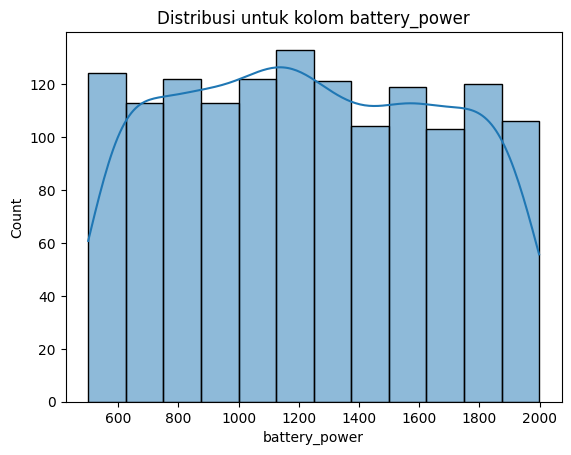

Kurtosis dari kolom battery_power adalah: -1.1680683536883105


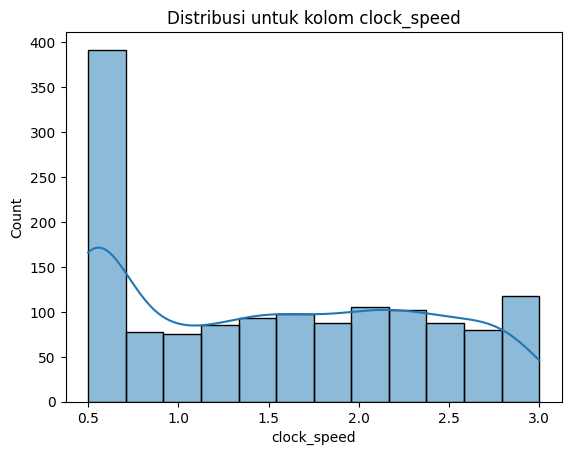

Kurtosis dari kolom clock_speed adalah: -1.3295231896521231


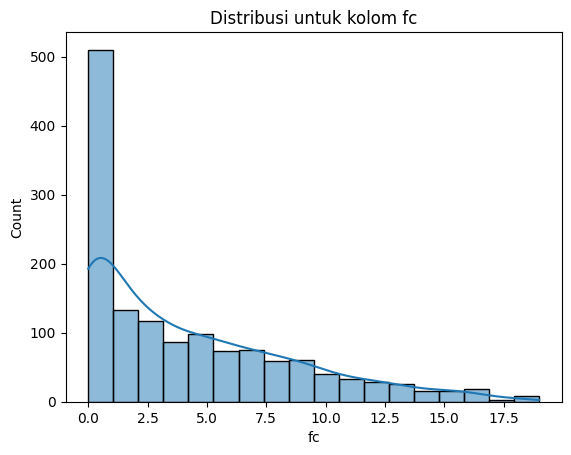

Kurtosis dari kolom fc adalah: 0.29340439238319194


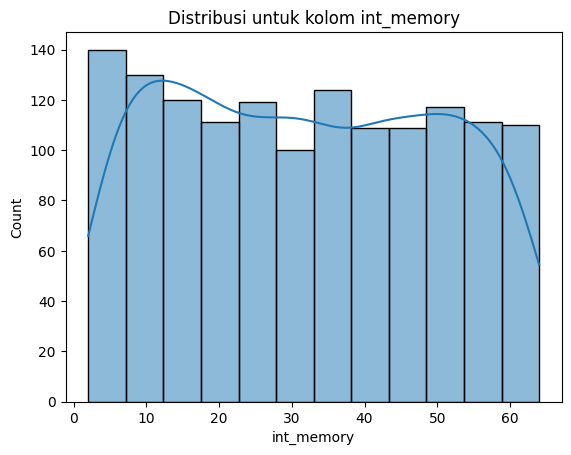

Kurtosis dari kolom int_memory adalah: -1.22719971066165


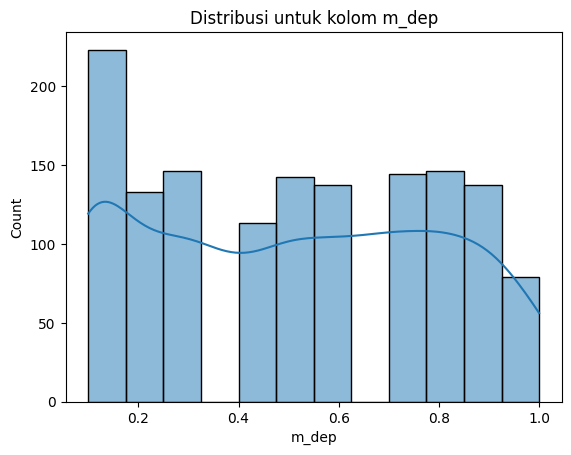

Kurtosis dari kolom m_dep adalah: -1.2668226719440638


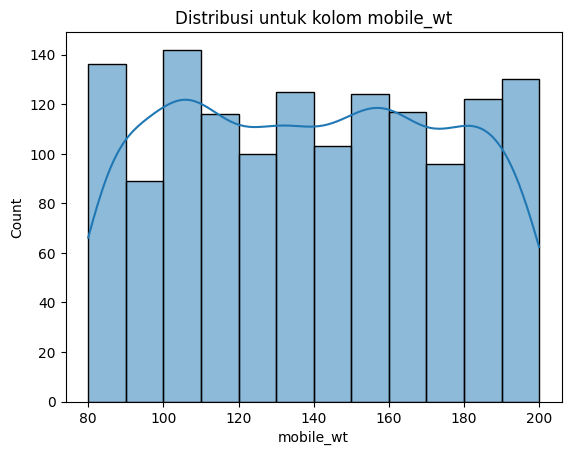

Kurtosis dari kolom mobile_wt adalah: -1.210202007194779


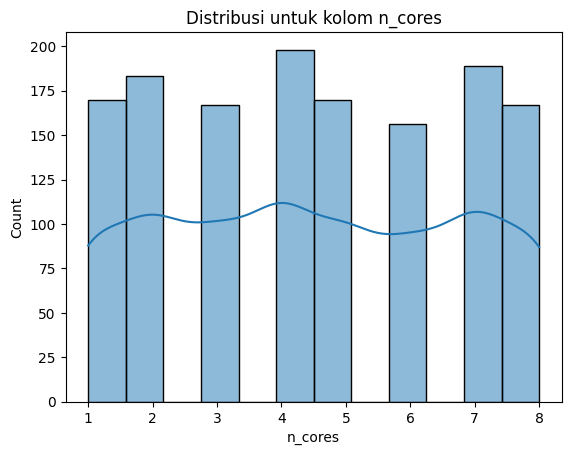

Kurtosis dari kolom n_cores adalah: -1.2322085699401253


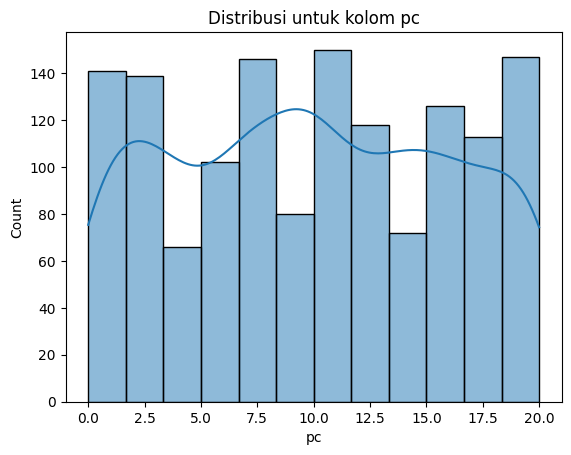

Kurtosis dari kolom pc adalah: -1.1638760893853588


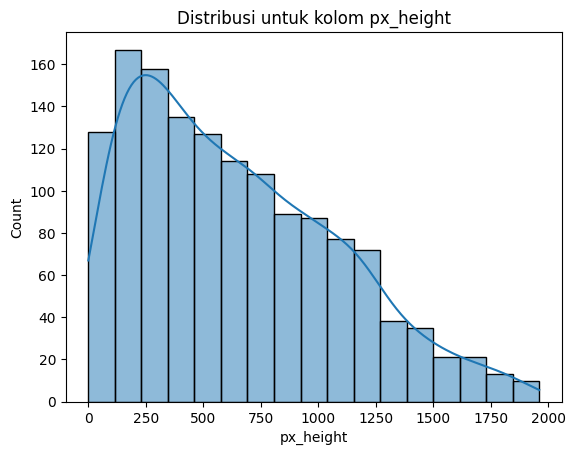

Kurtosis dari kolom px_height adalah: -0.3162286486894521


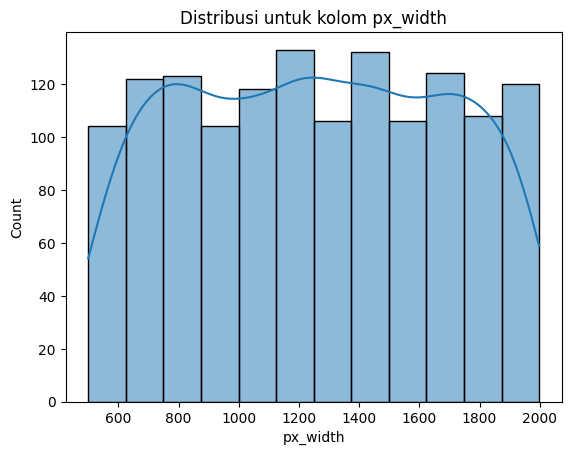

Kurtosis dari kolom px_width adalah: -1.1760245181224622


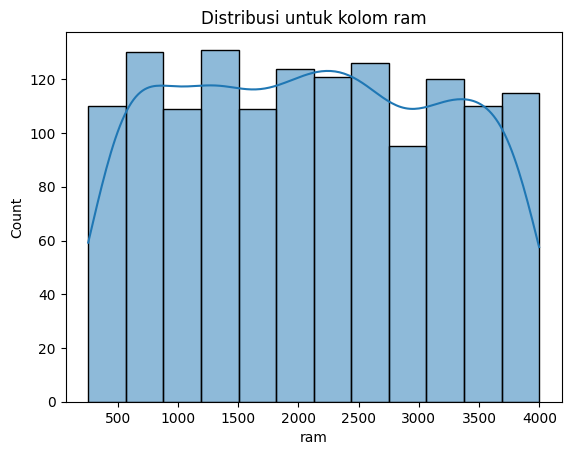

Kurtosis dari kolom ram adalah: -1.1861412453532745


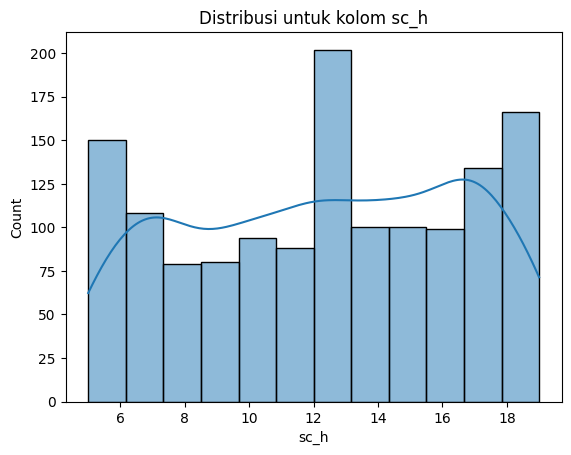

Kurtosis dari kolom sc_h adalah: -1.183273418204271


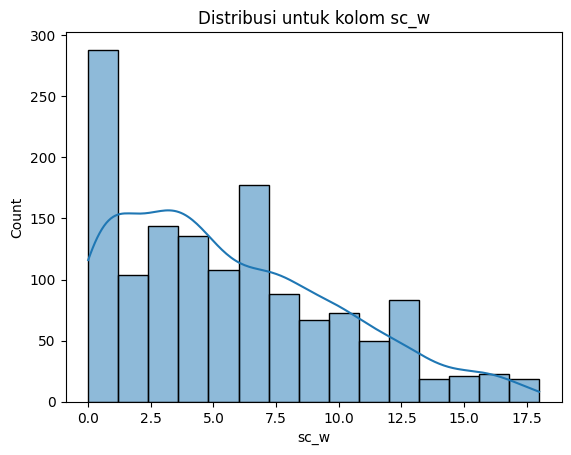

Kurtosis dari kolom sc_w adalah: -0.3346408708969695


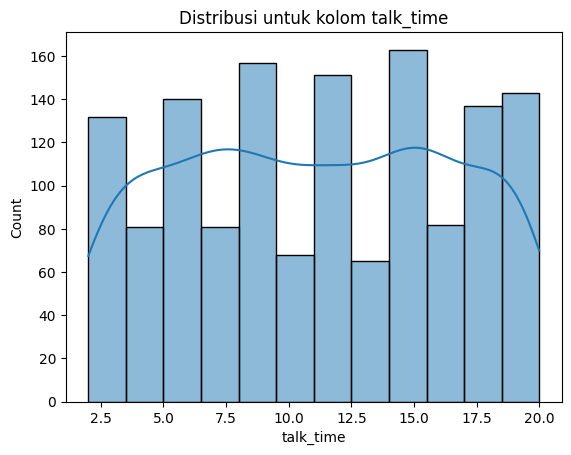

Kurtosis dari kolom talk_time adalah: -1.1920181405410146


In [ ]:
# Pengelompokan kolom
numerics = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Untuk kolom numerik: distribusi data (plot dan analisis kurtosis)
import seaborn as sns
import matplotlib.pyplot as plt

# Iterasi untuk tampilan distribusi
for column in numerics:
    # Distribusi plot dari kolom
    sns.histplot(data=df_train, x=column, kde=True)
    plt.title(f"Distribusi untuk kolom {column}")
    plt.show()

    # Calculate the kurtosis of the current column
    kurtosis = df_train[column].kurtosis();
    print(f"Kurtosis dari kolom {column} adalah: {kurtosis}")

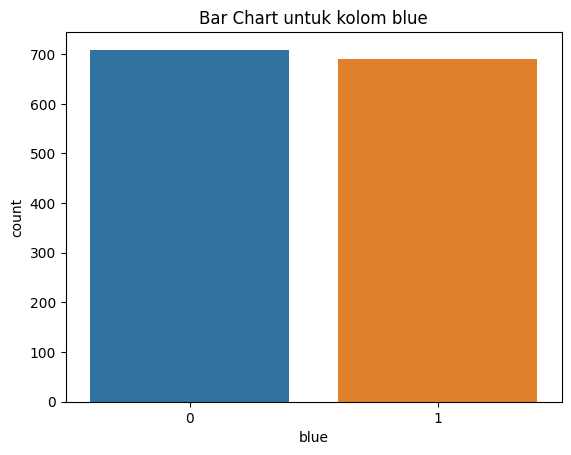

Jumlah data yang bernilai 0 adalah: 709
Jumlah data yang bernilai 1 adalah: 691


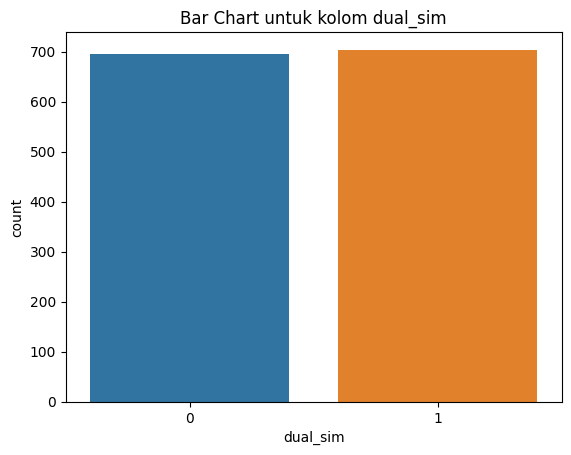

Jumlah data yang bernilai 0 adalah: 696
Jumlah data yang bernilai 1 adalah: 704


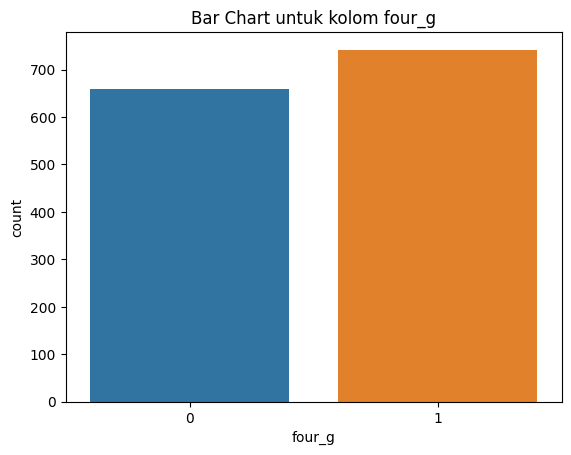

Jumlah data yang bernilai 0 adalah: 658
Jumlah data yang bernilai 1 adalah: 742


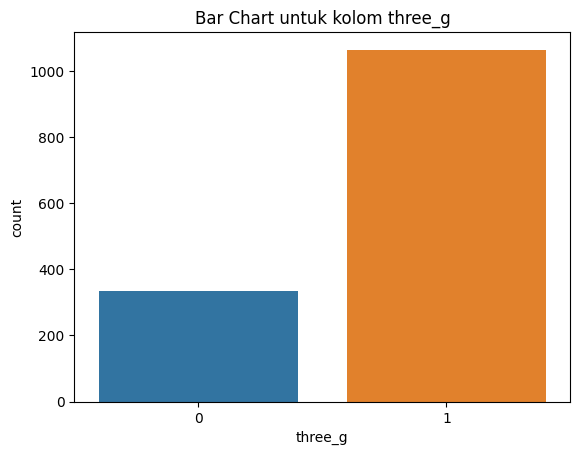

Jumlah data yang bernilai 0 adalah: 335
Jumlah data yang bernilai 1 adalah: 1065


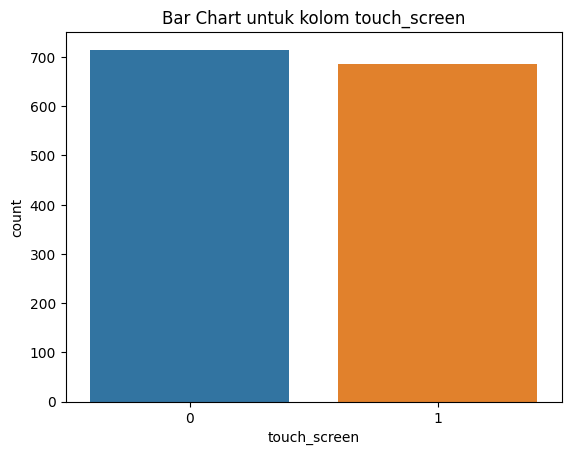

Jumlah data yang bernilai 0 adalah: 715
Jumlah data yang bernilai 1 adalah: 685


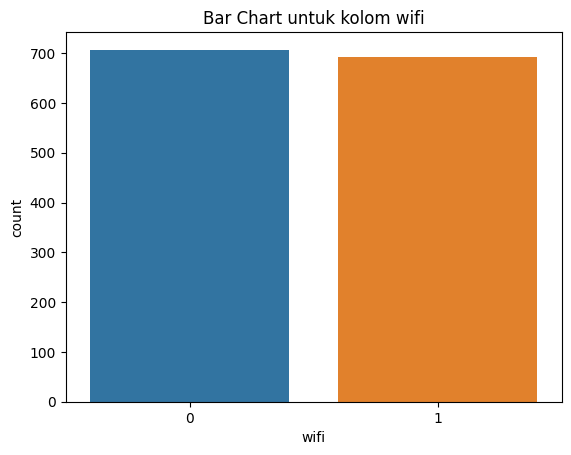

Jumlah data yang bernilai 0 adalah: 707
Jumlah data yang bernilai 1 adalah: 693


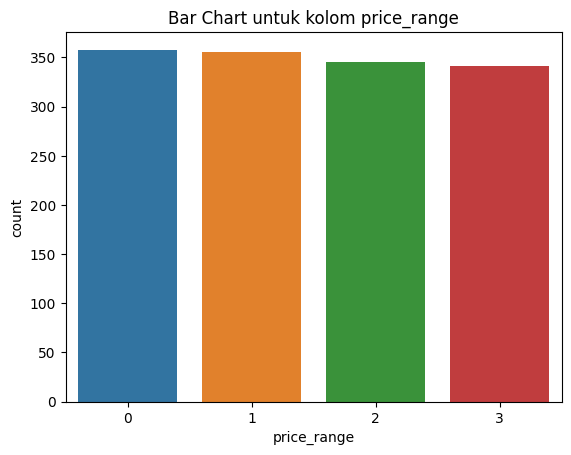

Jumlah data yang bernilai 0 adalah: 358
Jumlah data yang bernilai 1 adalah: 356
Jumlah data yang bernilai 2 adalah: 345
Jumlah data yang bernilai 3 adalah: 341


In [ ]:
non_numerics = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Untuk kolom non numerik: bar chart
# Iterasi untuk tampilan bar chart
for column in non_numerics:
    sns.countplot(data=df_train, x=column)
    plt.title(f"Bar Chart untuk kolom {column}")
    plt.show()
    
    data0 = df_train[column].eq(0).sum()
    data1 = df_train[column].eq(1).sum()
    print("Jumlah data yang bernilai 0 adalah:" ,data0)
    print("Jumlah data yang bernilai 1 adalah:" ,data1)
    
    if column == "price_range":
        data2 = df_train[column].eq(2).sum()
        data3 = df_train[column].eq(3).sum()
        print("Jumlah data yang bernilai 2 adalah:" ,data2)
        print("Jumlah data yang bernilai 3 adalah:" ,data3)

<h3>Analisis distribusi data:</h3><br>
Berdasarkan hasil penggambaran distribusi data yang ada baik untuk kolom numerik (menampilkan plot dan nilai kurtosis) serta untuk kolom non numerik (menampilkan bar chart), dari keduanya sudah banyak atribut yang menunjukkan persebaran data yang cukup merata. Hal ini ditandai untuk kolom numerik, persebaran data yang ada sudah cukup landai dan juga sudah banyak data yang memiliki nilai kurtosis yang berada dibawah 0 sehingga berdasarkan diagram kurtosis yang ada dibawah ini:

Berdasarkan hasil data yang ada, karena untuk berbagai macam data sudah memiliki nilai kurtosis yang bersifat negatif, maka pengelompokkan data yang ada termasuk dalam negative kurtosis atau playkurti. Hal ini menunjukkan bahwa persebaran data yang ada sudah merata dan tidak terpusat pada satu nilai saja.

Meskipun begitu, masih ada atribut yang memiliki nilai kurtosis yang bersifat positif seperti pada atribut fc dengan nilai kurtosis sebesar 0.29. Hal ini menunjukkan bahwa data yang terdapat pada kolom fc memiliki banyak kesamaan pada sebuah nilai (dalam distribusi plot nilai data dari kolom fc terpusat pada awal plot saja) sehingga memang memungkinkan bahwa kurtosis dapat memiliki nilai yang lebih dari 0.

Untuk analisis dari data yang bersifat non-numerik, secara keseluruhan bar chart yang ada sudah menunjukkan data yang cukup merata dengan selisih antara banyaknya nilai yang satu dengan nilai yang lain tidak terlalu jauh. Namun, terdapat pengecualian yang terjadi yaitu untuk kolom three_g dengan data yang tersebar pada nilai 1 yang menunjukkan bahwa ponsel sudah mendukung teknologi three_g memiliki banyak data yang jauh lebih banyak jika dibandingkan dengan ponsel yang tidak memiliki teknologi three_g (bernilai 0), hal ini dapat dibuktikan berdasar pada persebaran nilai kuartil yang ada pada kolom ini (nilai terdapat pada nomor awal) yang menunjukkan bahwa nilai untuk kuartil atas, tengah, hingga akhir semuanya sama bernilai 1 yang menunjukkan terjadinya data yang timpang. 

```
```
***
```
```

<h2>6. Menampilkan Korelasi dengan kolom target</h2>

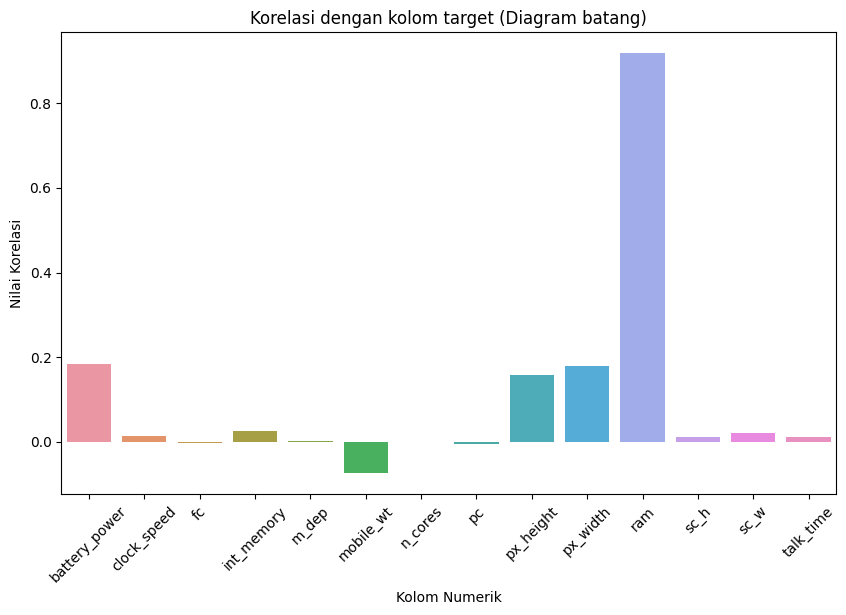

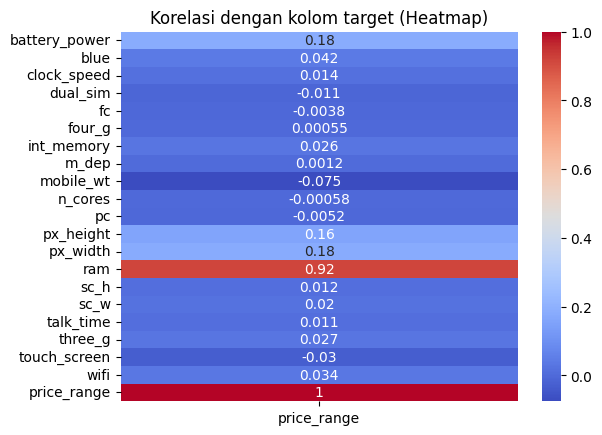

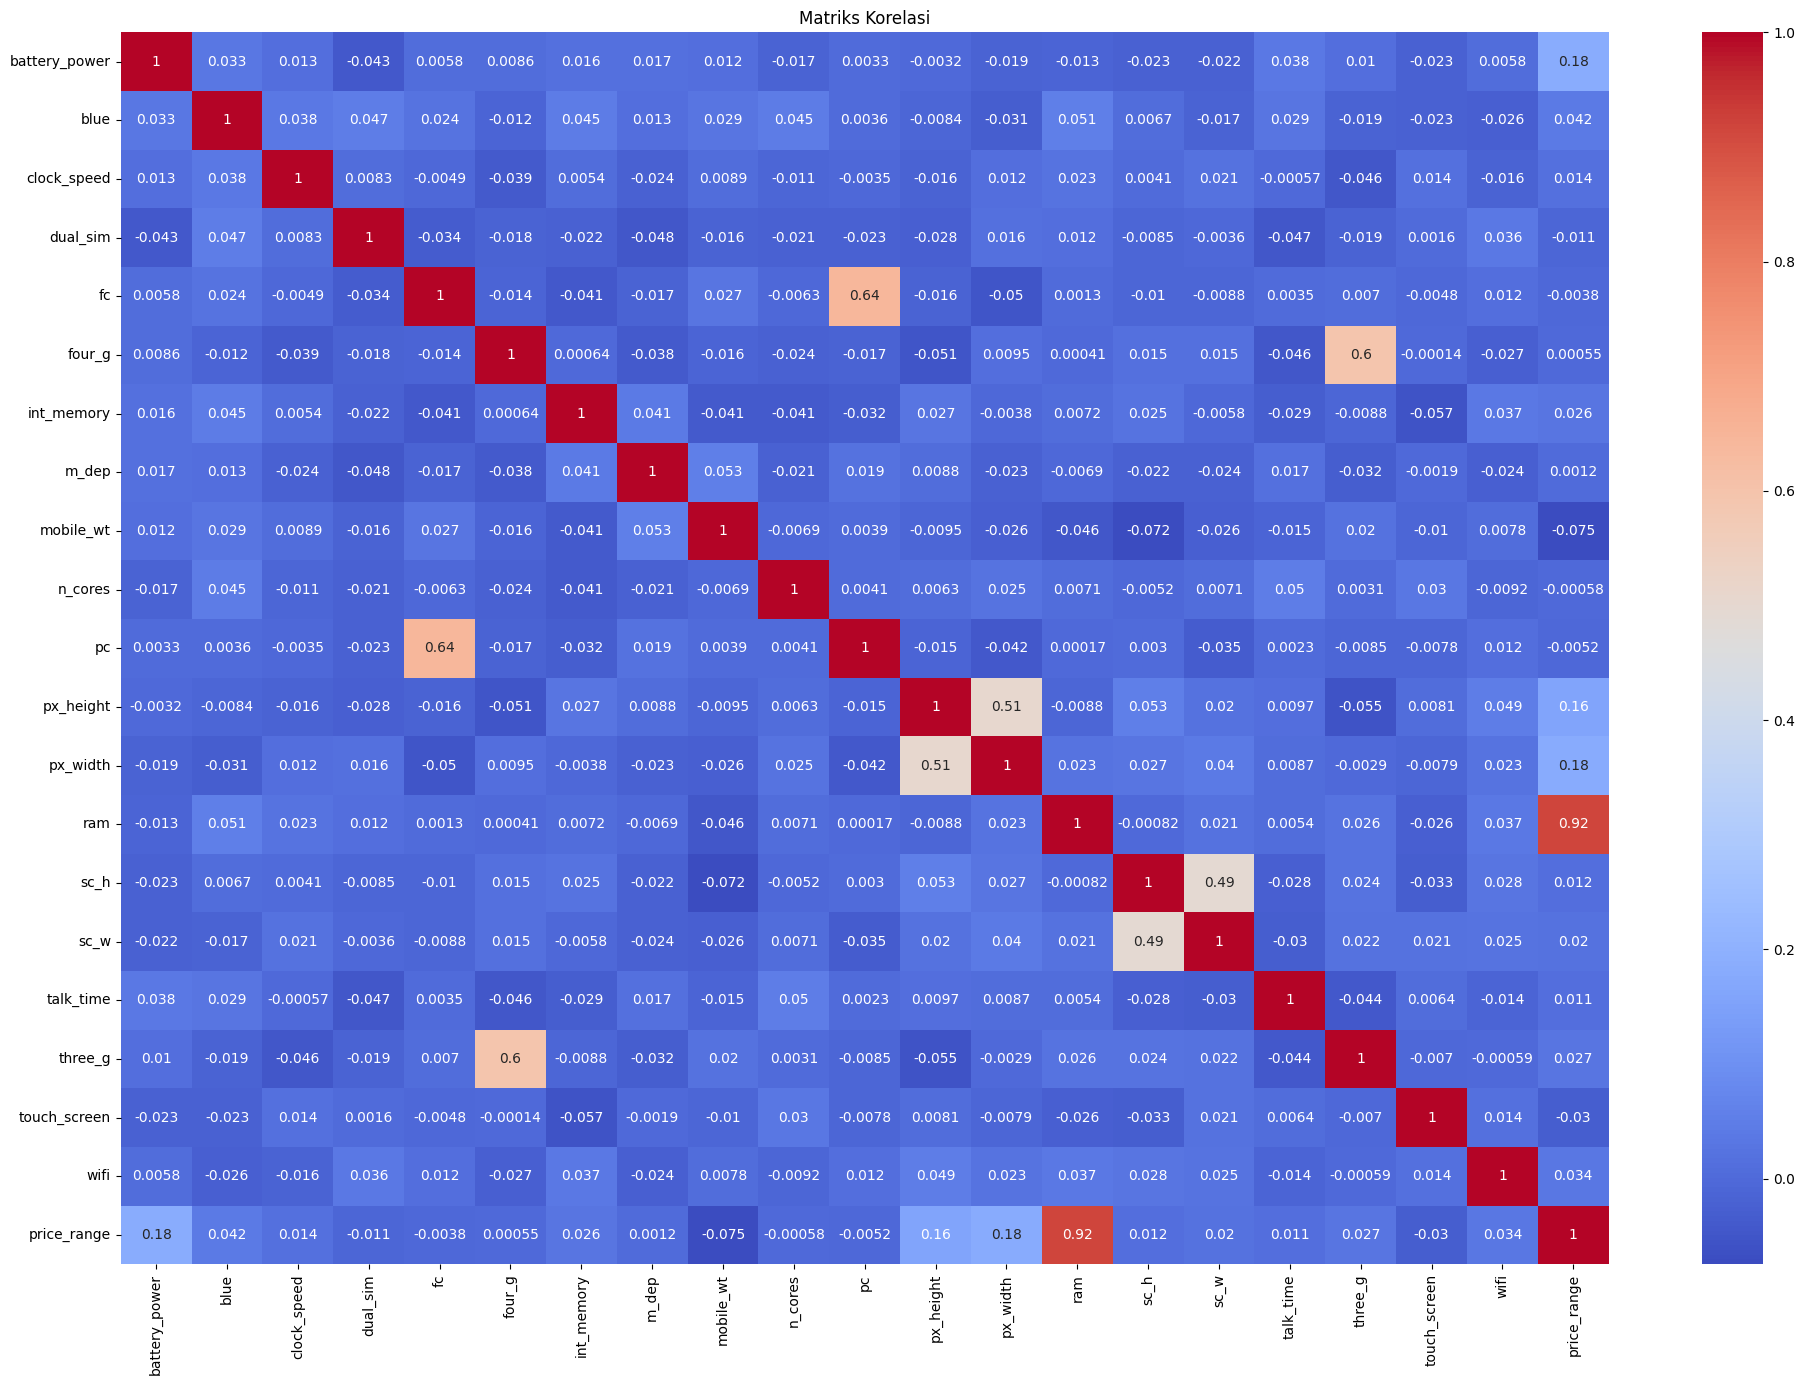

In [ ]:
# Buat diagram korelasi dengan target adalah kolom price_range untuk setiap kolom

# Menampilkan korelasi dalam diagram batang
correlation = df_train[numerics].corrwith(df_train['price_range'])
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title("Korelasi dengan kolom target (Diagram batang)")
plt.xlabel("Kolom Numerik")
plt.ylabel("Nilai Korelasi")
plt.xticks(rotation=45)
plt.show()

# Menampilkan korelasi dengan heatmap (untuk satu atribut yaitu kolom target -> price_range)
correlation = df_train.corr()[['price_range']]
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasi dengan kolom target (Heatmap)")

# Menampilkan korelasi dengan heatmap untuk semua kolom
# Membuat korelasi matrix
correlation_matrix = df_train.corr()

# Plot dari korelasi matriks
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

<h3>Analisis:</h3><br>
Berdasarkan hasil penggambaran korelasi dari berbagai kolom data dengan kolom target yaitu price_range, didapatkan hasil bahwa untuk keseluruhan kolom yang ada semuanya sudah memiliki nilai korelasi yang rendah ataupun tidak terlalu tinggi (antara dibawah 0 ataupun sampai 0.64 yang terbesar) sehingga dari kolom yang ada ini tidak menunjukkan relasi yang kuat sehingga tidak perlu dilakukan penghapusan kolom.

Namun, terdapat sebuah kolom yang memiliki tingkat korelasi yang besar yaitu kolom ram dengan nilai korelasinya sebesar 0.92 jika dibandingkan dengan kolom price_range sehingga kedua kolom ini memiliki korelasi yang saling berhubungan erat. Karena kedua kolom ini hubungannya erat, maka dapat dilakukan feature selection dengan menghilangkan salah satu fitur yang ada antara ram atau price_range dan seharusnya tidak akan terlalu berpengaruh pada pemrosesan hasil data secara keseluruhan. Dengan menghilangkan salah satu kolom, dapat menurunkan biaya komputasi pemodelan dan juga mampu untuk meningkatkan kinerja model.